This scripts it to test:
- the reshaping of the 3d array
- test of histogram creation
- test of histogram comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:
def reshape_array(big_array, volume_size):
    """
    Reshapes the bigger 3D array into a smaller 3D array by taking the mean of a volume
    from the bigger array and using the mean as one element of the smaller array.
    
    Args:
    big_array (ndarray): A 3D array representing the bigger array.
    volume_size (tuple): A tuple with 3 integers representing the size of the volume to create the mean.
    
    Returns:
    The reshaped smaller array with each element containing the mean of a corresponding volume
    from the bigger array.
    """
    big_array_size = big_array.shape
    
    # Calculate the padding needed to make the big array a multiple of the volume size
    padding = [((volume_size[i] - big_array_size[i] % volume_size[i]) % volume_size[i]) // 2 for i in range(3)]
    
    # Pad the big array
    padded_big_array = np.pad(big_array, [(padding[0], padding[0]), 
                                          (padding[1], padding[1]), 
                                          (padding[2], padding[2])])
    
    # Calculate the size of the small array
    small_array_size = tuple(int(padded_big_array.shape[i] / volume_size[i]) for i in range(3))
    small_array = np.zeros(small_array_size)
    
    # Iterate over each element of the smaller array
    for i in range(small_array_size[0]):
        for j in range(small_array_size[1]):
            for k in range(small_array_size[2]):
                # Calculate the mean of the volume from the bigger array
                volume_mean = np.mean(padded_big_array[i*volume_size[0]:(i+1)*volume_size[0],
                                                       j*volume_size[1]:(j+1)*volume_size[1],
                                                       k*volume_size[2]:(k+1)*volume_size[2]])
                # Assign the mean to the corresponding index in the smaller array
                small_array[i, j, k] = volume_mean
    
    return small_array

flattened length of big array: 729 shape of big array: (9, 9, 9)
flattened length of small array: 27 shape of small array: (3, 3, 3) factor of reduction: 27.0


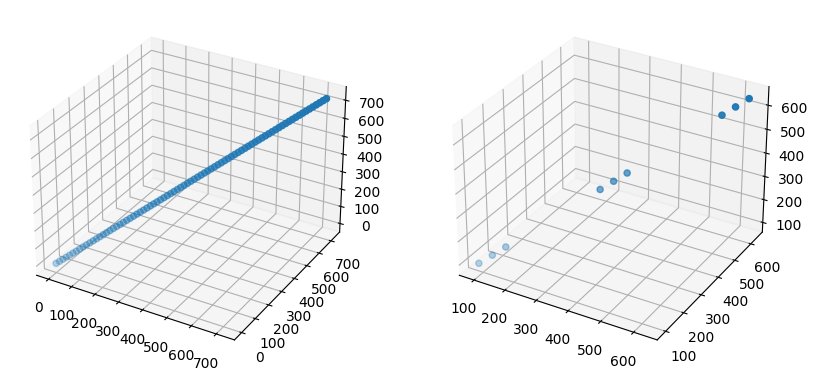

In [42]:
# create a 3d array
a = np.arange(9*9*9).reshape(9, 9, 9)
print(f"flattened length of big array: {len(a.flatten())}",
      f"shape of big array: {a.shape}",)

# reshape the array
reshape_factor = 3
b = reshape_array(a, (reshape_factor, reshape_factor, reshape_factor))
print(f"flattened length of small array: {len(b.flatten())}",
      f"shape of small array: {b.shape}",
      f"factor of reduction: {len(a.flatten()) / len(b.flatten())}")

# 3d subplot with big and small array next to each other
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(a[:, :, 0], a[:, :, 1], a[:, :, 2])
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(b[:, :, 0], b[:, :, 1], b[:, :, 2])
plt.show()

27.0
27


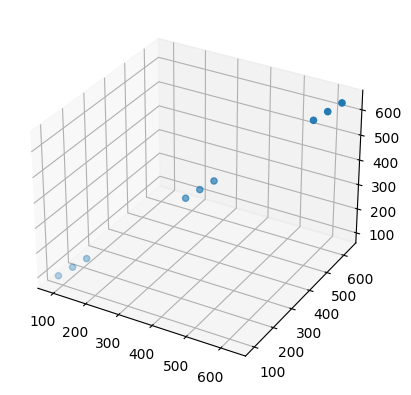

In [40]:
b = reshape_array(a, (3, 3, 3))
print(f"{len(a.flatten()) / len(b.flatten())}")
print(len(b.flatten()))

# print the array in a 3d view
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(b[:, :, 0], b[:, :, 1], b[:, :, 2])
plt.show()